In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

## 1. ​​Create​​ a ​​multivariate​​ time ​​series; ​​perform ​​any ​​interpolations.​​​​

Dependent variable: pct_fear (%people who are afaraid to walk in their neighborhood at night).

Independent variables:

1) year 2) age 3) gun_pct(%people who have been threatened with a gun or shot at) 4) burglr_pct (% people who's home was broken into in the last year)

In [3]:
# Grab the data that we need
gss = pd.read_csv("D:/QMSS/TA/trends-gss.csv")
variables = ["year", "fear", "age",  "gun", "burglr", "realinc"]
sub = gss[variables].copy()

In [4]:
# Recode variables and creating indicator variables
sub['nfear'] = np.where(sub['fear'] == 1, 1, 0)
sub['ngun'] = np.where(sub['gun'] == 1, 1, 0)
sub['nburglr'] = np.where(sub['burglr'] == 1, 1, 0)
sub['income'] = sub['realinc']

In [5]:
# Get means by year
by_year = sub.groupby('year', as_index = False).agg('mean').replace({0.000000: np.nan})
by_year


,year,fear,age,gun,burglr,realinc,nfear,ngun,nburglr,income
0,1972,NaN,44.950871,NaN,NaN,28388.599050,NaN,NaN,NaN,28388.599050
1,1973,1.589382,44.182000,1.836218,1.924867,31362.326648,0.406250,0.163564,0.075133,31362.326648
2,1974,1.549592,44.591340,NaN,1.923700,32124.533530,0.446765,NaN,0.076146,32124.533530
3,1975,NaN,44.307744,1.827052,NaN,29403.917555,NaN,0.172483,NaN,29403.917555
4,1976,1.559651,45.286671,1.828991,1.929144,28273.748924,0.438292,0.170781,0.070714,28273.748924
5,1977,1.548684,44.663165,NaN,1.933857,32640.561516,0.448366,NaN,0.066013,32640.561516
6,1978,NaN,44.009836,1.796865,NaN,30178.039804,NaN,0.203003,NaN,30178.039804
7,1980,1.567995,44.974640,1.789617,1.916724,31333.190722,0.428474,0.209809,0.083106,31333.190722
8,1982,1.511892,44.859079,NaN,1.917026,24545.821322,0.485484,NaN,0.082796,24545.821322
9,1983,NaN,44.296482,1.795739,NaN,30693.476944,NaN,0.203877,NaN,30693.476944


In [6]:
by_year = by_year.sort_values('year')
by_year = by_year.set_index("year", drop = False)

# Interpolate missing values of time series linearly
by_year_ts = by_year.interpolate(method = 'linear')
by_year_ts

,year,fear,age,gun,burglr,realinc,nfear,ngun,nburglr,income
year,,,,,,,,,,
1972,1972,NaN,44.950871,NaN,NaN,28388.599050,NaN,NaN,NaN,28388.599050
1973,1973,1.589382,44.182000,1.836218,1.924867,31362.326648,0.406250,0.163564,0.075133,31362.326648
1974,1974,1.549592,44.591340,1.831635,1.923700,32124.533530,0.446765,0.168024,0.076146,32124.533530
1975,1975,1.554622,44.307744,1.827052,1.926422,29403.917555,0.442529,0.172483,0.073430,29403.917555
1976,1976,1.559651,45.286671,1.828991,1.929144,28273.748924,0.438292,0.170781,0.070714,28273.748924
1977,1977,1.548684,44.663165,1.812928,1.933857,32640.561516,0.448366,0.186892,0.066013,32640.561516
1978,1978,1.558339,44.009836,1.796865,1.925290,30178.039804,0.438420,0.203003,0.074560,30178.039804
1980,1980,1.567995,44.974640,1.789617,1.916724,31333.190722,0.428474,0.209809,0.083106,31333.190722
1982,1982,1.511892,44.859079,1.792678,1.917026,24545.821322,0.485484,0.206843,0.082796,24545.821322


In [7]:
by_year_ts=by_year_ts.dropna() # dropping na values from 1972 and in essence, the whole row because it's values cannot be interpolated
by_year_ts

,year,fear,age,gun,burglr,realinc,nfear,ngun,nburglr,income
year,,,,,,,,,,
1973,1973,1.589382,44.182000,1.836218,1.924867,31362.326648,0.406250,0.163564,0.075133,31362.326648
1974,1974,1.549592,44.591340,1.831635,1.923700,32124.533530,0.446765,0.168024,0.076146,32124.533530
1975,1975,1.554622,44.307744,1.827052,1.926422,29403.917555,0.442529,0.172483,0.073430,29403.917555
1976,1976,1.559651,45.286671,1.828991,1.929144,28273.748924,0.438292,0.170781,0.070714,28273.748924
1977,1977,1.548684,44.663165,1.812928,1.933857,32640.561516,0.448366,0.186892,0.066013,32640.561516
1978,1978,1.558339,44.009836,1.796865,1.925290,30178.039804,0.438420,0.203003,0.074560,30178.039804
1980,1980,1.567995,44.974640,1.789617,1.916724,31333.190722,0.428474,0.209809,0.083106,31333.190722
1982,1982,1.511892,44.859079,1.792678,1.917026,24545.821322,0.485484,0.206843,0.082796,24545.821322
1983,1983,1.545401,44.296482,1.795739,1.925542,30693.476944,0.450142,0.203877,0.074324,30693.476944


In [8]:
# Convert to percentage terms
by_year_ts['gun_pct'] = by_year_ts['ngun']*100
by_year_ts['fear_pct'] = by_year_ts['nfear']*100
by_year_ts['burglr_pct'] = by_year_ts['nburglr']*100


C:\Users\suisx\AppData\Local\Temp\ipykernel_19124\2365516805.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  by_year_ts['gun_pct'] = by_year_ts['ngun']*100
C:\Users\suisx\AppData\Local\Temp\ipykernel_19124\2365516805.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  by_year_ts['fear_pct'] = by_year_ts['nfear']*100
C:\Users\suisx\AppData\Local\Temp\ipykernel_19124\2365516805.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

### 2) Graph the relationship between X and Y

In [9]:
# Graph correlation between time series
corr_vars = ['fear_pct', 'gun_pct','burglr_pct','age', 'income', 'year']
by_year_ts[corr_vars].corr()

,fear_pct,gun_pct,burglr_pct,age,income,year
fear_pct,1.000000,0.861905,0.911016,-0.731836,-0.667183,-0.875206
gun_pct,0.861905,1.000000,0.949776,-0.722228,-0.638775,-0.861745
burglr_pct,0.911016,0.949776,1.000000,-0.740037,-0.575645,-0.895290
age,-0.731836,-0.722228,-0.740037,1.000000,0.477032,0.875384
income,-0.667183,-0.638775,-0.575645,0.477032,1.000000,0.544967
year,-0.875206,-0.861745,-0.895290,0.875384,0.544967,1.000000


<Axes: >

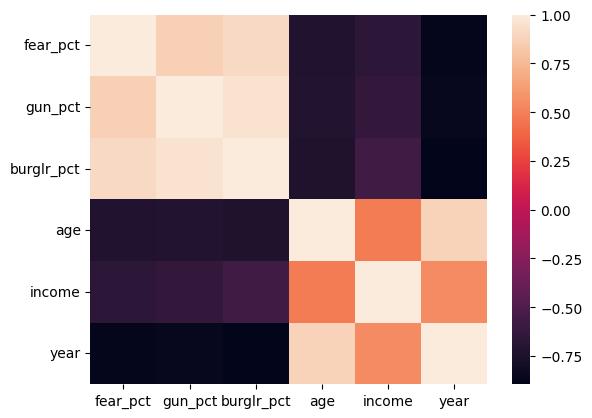

In [10]:
sns.heatmap(by_year_ts[corr_vars].corr())

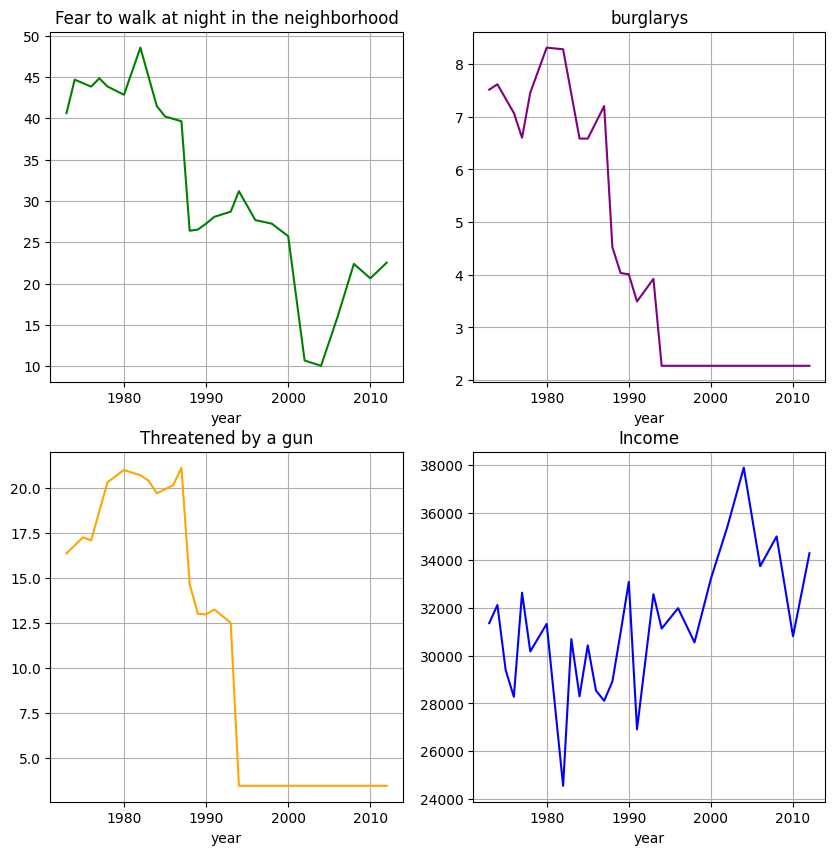

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

by_year_ts['fear_pct'].plot(title = 'Fear to walk at night in the neighborhood', color = 'g', ax = axes[0,0], grid = True)
by_year_ts['burglr_pct'].plot(title = 'burglarys', color = 'purple', ax = axes[0,1], grid = True)
by_year_ts['gun_pct'].plot(title = 'Threatened by a gun', color = 'orange', ax = axes[1,0], grid = True)
by_year_ts['income'].plot(title = 'Income', color = 'b', ax = axes[1,1], grid = True)

plt.show()

According to the above graphs, I feel that that our dependent variable Y which is the percent of people who feel afraid to walk at night in their neighborhood is more or less positively associated with the percent of people who have been threatened by a gun or shot at. It adds up logically as well. Being shot at is a traumatising experience and most people would be worried or scared to walk at night after such an incident.

I also feel that the percent of people who feel afraid to walk at night in their neighborhood is more or less positively associated with the percent of people who have had a burglary in their house in the recent year as well. If a person can break into your home which is considered your safe space, you'd obviously be more scared in general atleast for a few months.

If we see the trend on income, while it is not as obvious as the other two, we can see a gradual increase in income. People who are richer, live in safer neighborhoods, have cars to keep them safe and do not in general have to face similar circumstances. I can say that they probably do not have as much correlation as the other two but the correlation is negative.

### ​​3. ​​Run ​​a ​​simple ​​time​ ​series ​​regression, ​​with ​​one ​​X ​​and ​​no ​​trend. ​​​​Interpret ​​it

In [12]:
lm_fear = smf.ols('fear_pct ~ gun_pct', data = by_year_ts).fit()
lm_fear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               fear_pct   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     75.12
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           3.81e-09
Time:                        14:17:01   Log-Likelihood:                -87.722
No. Observations:                  28   AIC:                             179.4
Df Residuals:                      26   BIC:                             182.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.0382      2.192      7.315      0.000      11.532      20.545
gun_pct        1.3175      0.152      8.667      0.000       1.005       1.630
==============================================================================
Omnibus:                        1.681   Durbin-Watson:                   0.752
Prob(Omnibus):                  0.431   Jarque-Bera (JB):                1.137
Skew:                          -0.200   Prob(JB):                        0.566
Kurtosis:                       2.098   Cond. No.                         29.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

According to the above regression, for a 1 point increase in the percent of people who have experienced being threatened by a gun, there is on average a 1.3 point increase in the percent of people afraid to walk at night in the neighborhood. It is statistically significant with a p-value of 0 which is less than 0.05.
The R-sq value is pretty high at 0.74. This means that 74% of the variation in fear is explained by the experience of being threatened by a gun. However, these high R-sq values are deceptive because of aggregation bias. The model ignores a lot of individual variances.

### 4. Run a time series regression with one X and trend. Interpret it. Perform autocorrelation diagnostics. Explain what you found.


In [13]:
lm_fear2 = smf.ols('fear_pct ~ gun_pct + year', data = by_year_ts).fit()
lm_fear2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               fear_pct   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     53.66
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           9.00e-10
Time:                        14:17:03   Log-Likelihood:                -83.409
No. Observations:                  28   AIC:                             172.8
Df Residuals:                      25   BIC:                             176.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1011.5193    331.474      3.052      0.005     328.836    1694.202
gun_pct        0.6396      0.262      2.442      0.022       0.100       1.179
year          -0.4960      0.165     -3.003      0.006      -0.836      -0.156
==============================================================================
Omnibus:                        2.413   Durbin-Watson:                   0.884
Prob(Omnibus):                  0.299   Jarque-Bera (JB):                2.131
Skew:                          -0.630   Prob(JB):                        0.345
Kurtosis:                       2.509   Cond. No.                     6.93e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.93e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

According to the above regression, for a 1 point increase in the percent of people who have experienced being threatened by a gun, on average there is a 0.6 point increase in the percent of people who are afraid to walk at night in the neighborhood. It is statistically significant with a p-value of 0.022 which is less than 0.05.

The above regression also shows that with every year, the percent of people afraid to walk at night decreases by 0.49 points. It is statistically significant with a p-value of 0.006 which is less than 0.05

The R-sq value is pretty high at 0.81. This means that 81% of the variation in fear is explained by the independent variables of this model.

Testing for Heteroscedasticity using Breuschgpagan Test

In [14]:
from statsmodels.compat import lzip
name = ['BP', 'p-value', 'f-value', 'f p-value']

test2 = sm.stats.diagnostic.het_breuschpagan(lm_fear2.resid, lm_fear2.model.exog)
lzip(name, test2)

[('BP', 6.343730343759333),
 ('p-value', 0.041925326990835),
 ('f-value', 3.6616014925793468),
 ('f p-value', 0.04030140985185076)]

The p-value is significant at 0.04 which is less than 0.05. This proves that the null hypothesis is not true and that heteroscedasticity is present in this model.

Testing for Auto-correlation

In [15]:
from statsmodels.tsa.stattools import acf

err2 = lm_fear2.resid
acf(err2)

array([ 1.        ,  0.51640527,  0.0444329 , -0.26915547, -0.43729547,
       -0.37446615, -0.08246531,  0.05411426,  0.12438467,  0.21367019,
        0.05562109, -0.0477854 , -0.15966129, -0.08358274, -0.10513268])

D:\anaconda\anaconda_app\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


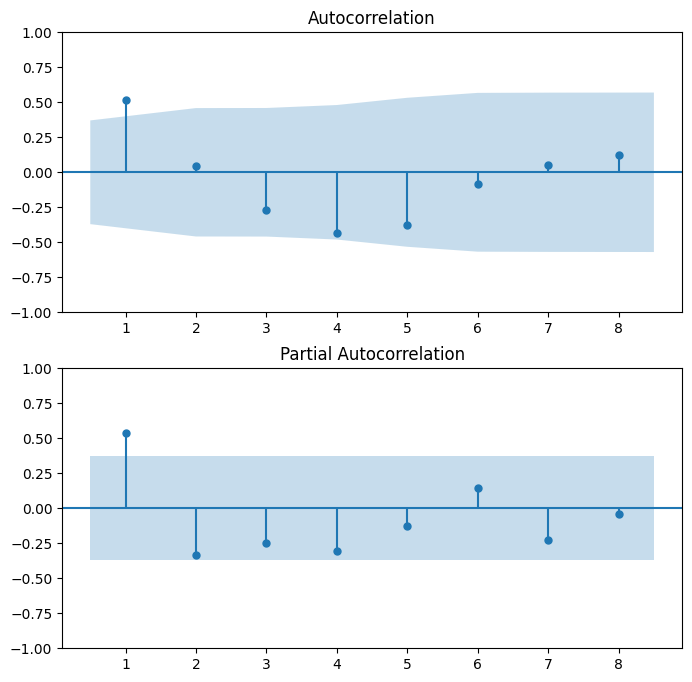

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(2, 1, figsize=(8, 8))
plot_acf(err2, lags = 8, zero = False, ax=ax[0]);
plot_pacf(err2, lags = 8, zero = False, ax=ax[1]);
plt.show()

According to the above plot, we can see that the first value is extending out of the confidence interval bend which shows that there is first order autocorrelation.

Testing for Autocorelation using the Breusch Godfrey Test

In [17]:
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import acorr_breusch_godfrey

print('Durbin Watson statistic:', durbin_watson(err2)) #Not actualy using Durbin-Watson to determine results as it doesnt show p value.

lmtest2, pval2, fval2, f_pval2 = acorr_breusch_godfrey(lm_fear2, nlags = 1)
print('LM test =', lmtest2)
print('p-value =', pval2)

Durbin Watson statistic: 0.8841732264249093
LM test = 8.153990432245848
p-value = 0.004296651231623455


According to the Breusch Godfrey Test, the p-value is significant and less than 0.05 which means that we reject our null hypothesis indicating that there is autocorrelation in this model.

### 5) Consider ​​running ​​a ​​time ​​series ​​regression ​​with ​​many ​​Xs ​​and ​​trend. ​​​​Interpret ​​that. Check VIF.

In [18]:
lm_fear3 = smf.ols('fear_pct ~ age + burglr_pct + gun_pct + year', data = by_year_ts).fit()
lm_fear3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               fear_pct   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     32.19
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           4.05e-09
Time:                        14:17:18   Log-Likelihood:                -80.321
No. Observations:                  28   AIC:                             170.6
Df Residuals:                      23   BIC:                             177.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    642.4797    449.157      1.430      0.166    -286.672    1571.631
age            0.2521      1.682      0.150      0.882      -3.228       3.732
burglr_pct     3.2735      1.410      2.322      0.029       0.357       6.190
gun_pct       -0.1037      0.398     -0.260      0.797      -0.928       0.720
year          -0.3197      0.250     -1.281      0.213      -0.836       0.197
==============================================================================
Omnibus:                        4.609   Durbin-Watson:                   0.973
Prob(Omnibus):                  0.100   Jarque-Bera (JB):                3.188
Skew:                          -0.805   Prob(JB):                        0.203
Kurtosis:                       3.378   Cond. No.                     1.01e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

According to the above regression, for a 1 point increase in the percent of people who have experienced being threatened by a gun, on average there is a 0.1 point decrease in the percent of people who are afraid to walk at night in the neighborhood. It is not statistically significant with a p-value of 0.79.

The above regression also shows that for a 1 point increase in the percent of people who have had a burglary in their home in the last one year, there is on average a 3.2 point increase in the percent of people who are afraid to walk at night in the neighborhood. It is statistically significant with a p-value of 0.02.

We can also see that with every year, the percent of people who are afraid to walk at night in the neighborhood decreases by 0.3 points. It has a p-value of 0.213 which means that it is not statistically significant.

While age does not have much to do with this, we can see that a 1 point increase in age leads to a 0.25 point increase in the percent of people who are scared to walk at night in their neighborhood. It has a p-value of 0.882 which indicates that it is not statistically significant

The R-sq value is pretty high at 0.84. This means that 84% of the variation in fear is explained by the independent variables of this model.

Checking for multicollinearity with VIF test

In [19]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

y, X = dmatrices('fear_pct ~ age + burglr_pct + gun_pct + year',
                 data = by_year_ts, return_type = 'dataframe')

vif = pd.DataFrame()
vif['VIR Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif.iloc[1:]

,VIR Factor,features
1,4.472954,age
2,13.699645,burglr_pct
3,10.304800,gun_pct
4,10.177371,year


According to the above results, we can conclude that the problem of multicollinearity exists among the variables. The VIR Factor for burglary in the respondent's house in the last one year is 13.69 , the VIR Factor for the experience of being threatened by a gun or being shot is 10.3 and the VIR Factor for year is 10.1. These are high values of the VIR Factor that indicate multicollinearity in the above variables- burglr_pct,gun_pct and year. In this scenario, the variables inflate each others effects. Age has a low value of the VIR Factor at 4.47

### 6) Run a first-differenced time series regression. Interpret that.

In [20]:
by_yearFD = pd.DataFrame()

by_yearFD = by_year_ts[['fear_pct', 'age', 'gun_pct', 'burglr_pct']]
by_yearFD = by_yearFD.diff()

by_yearFD['year'] = by_year_ts['year']

In [21]:
lm_fear4 = smf.ols('fear_pct ~ gun_pct + year', data = by_yearFD).fit()
lm_fear4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               fear_pct   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                 -0.036
Method:                 Least Squares   F-statistic:                    0.5457
Date:                Tue, 19 Dec 2023   Prob (F-statistic):              0.586
Time:                        14:17:22   Log-Likelihood:                -78.971
No. Observations:                  27   AIC:                             163.9
Df Residuals:                      24   BIC:                             167.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -21.3885    166.338     -0.129      0.899    -364.693     321.916
gun_pct        0.4434      0.424      1.045      0.307      -0.433       1.319
year           0.0105      0.084      0.126      0.901      -0.162       0.183
==============================================================================
Omnibus:                       13.610   Durbin-Watson:                   1.893
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.098
Skew:                          -1.204   Prob(JB):                     0.000527
Kurtosis:                       5.760   Cond. No.                     3.60e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.6e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

According to the above regression, for a 1 point increase in the difference of the percent of people who have experienced being threatened by a gun, on average there is a 0.44 point decrease in difference of the percent of people who are afraid to walk at night in their neighborhood. It is not statistically significant with a p-value of 0.307.

It also shows that with every year, there is a 0.01 point increase in the difference of percent of people who feel scared to walk at night in their neighborhood. It has a p-value of 0.901 which is less than 0.05 indicating that it is not statistically significant.

 The R-sq value is very low and has dropped down to 0.04  from 0.84. This means that 4% of the variation in fear is explained by the independent variables of this model. This reduction is because we took first differences and eliminated problems like bias.

### 7. Check your variables for unit roots. Do some test. Interpret them.

In [22]:
pip install arch

Note: you may need to restart the kernel to use updated packages.


In [23]:
from arch import unitroot
from arch.unitroot import ADF, PhillipsPerron, DFGLS
by_year_ts

,year,fear,age,gun,burglr,realinc,nfear,ngun,nburglr,income,gun_pct,fear_pct,burglr_pct
year,,,,,,,,,,,,,
1973,1973,1.589382,44.182000,1.836218,1.924867,31362.326648,0.406250,0.163564,0.075133,31362.326648,16.356383,40.625000,7.513298
1974,1974,1.549592,44.591340,1.831635,1.923700,32124.533530,0.446765,0.168024,0.076146,32124.533530,16.802353,44.676550,7.614555
1975,1975,1.554622,44.307744,1.827052,1.926422,29403.917555,0.442529,0.172483,0.073430,29403.917555,17.248322,44.252885,7.342968
1976,1976,1.559651,45.286671,1.828991,1.929144,28273.748924,0.438292,0.170781,0.070714,28273.748924,17.078052,43.829219,7.071381
1977,1977,1.548684,44.663165,1.812928,1.933857,32640.561516,0.448366,0.186892,0.066013,32640.561516,18.689157,44.836601,6.601307
1978,1978,1.558339,44.009836,1.796865,1.925290,30178.039804,0.438420,0.203003,0.074560,30178.039804,20.300261,43.842006,7.455967
1980,1980,1.567995,44.974640,1.789617,1.916724,31333.190722,0.428474,0.209809,0.083106,31333.190722,20.980926,42.847411,8.310627
1982,1982,1.511892,44.859079,1.792678,1.917026,24545.821322,0.485484,0.206843,0.082796,24545.821322,20.684334,48.548387,8.279570
1983,1983,1.545401,44.296482,1.795739,1.925542,30693.476944,0.450142,0.203877,0.074324,30693.476944,20.387742,45.014180,7.432385


In [24]:
ADF(by_year_ts['fear_pct'], lags = int(4*(len(by_year_ts)/100)**(2/9)), trend = 'c')

Test Statistic,-0.967
P-value,0.765
Lags,3


According to the above test, we can see that the p-value is 0.765 which is greater than 0.05 which means that there are unit roots present in the fear_pct time series process

In [25]:
DFGLS(by_year_ts['fear_pct'], lags = int(4*(len(by_year_ts)/100)**(2/9)), trend = 'c')

Test Statistic,-0.897
P-value,0.336
Lags,3


According to the Dickey Fuller Generalised Least Squares, we can see that the p-value is at 0.336 which is greater than 0.05 which means that there are unit roots present in the fear_pct time series process.

In [26]:
PhillipsPerron(by_year_ts['fear_pct'], lags = 3)

Test Statistic,-0.963
P-value,0.766
Lags,3


According to the Phillips Perron test, we can see that the p-value is 0.766 which is greater than 0.05 which means that there are unit roots present in the fear_pct time series process.

### 8. Perform an Automatic ARIMA on the residuals from one of your earlier models. Tell me what it says.

In [27]:
!pip install pmdarima

     ---------------------------------------- 2.8/2.8 MB 43.9 MB/s eta 0:00:00


In [28]:
from pmdarima.arima import auto_arima
import warnings
warnings.filterwarnings("ignore")

auto_arima(err2, trace = True, test='kpss', information_criterion='bic')

Performing stepwise search to minimize bic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : BIC=inf, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : BIC=173.483, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : BIC=167.548, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : BIC=166.390, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : BIC=170.151, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : BIC=168.769, Time=0.02 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : BIC=168.621, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : BIC=inf, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0]             : BIC=163.060, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0]             : BIC=165.441, Time=0.01 sec
 ARIMA(0,0,2)(0,0,0)[0]             : BIC=165.291, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : BIC=164.225, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0]             : BIC=inf, Time=0.05 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 0.380 seconds


ARIMA(order=(0, 0, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

According to the above analysis, the best model to use would be the:  
ARIMA(0,0,1)(0,0,0)[0]             : BIC=163.060, Time=0.01 sec  
which is a first order MA model. It has a BIC of 166.390 and an intercept is supposed to be included.

### 9. Run an ARIMA that follows from Step 8. Interpret that, too.

In [39]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit an ARIMA(0,0,1) model using SARIMAX, without an intercept, including exogenous variables
arima_fear = SARIMAX(endog=by_year_ts['fear_pct'], order=(0, 0, 1),
                     exog=by_year_ts[['gun_pct', 'year']], trend='n').fit()

In [40]:
arima_fear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               fear_pct   No. Observations:                   28
Model:               SARIMAX(0, 0, 1)   Log Likelihood                 -81.233
Date:                Tue, 19 Dec 2023   AIC                            170.467
Time:                        14:48:49   BIC                            175.796
Sample:                             0   HQIC                           172.096
                                 - 28                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
gun_pct        1.2527      0.263      4.759      0.000       0.737       1.769
year           0.0085      0.002      4.208      0.000       0.005       0.012
ma.L1          0.6544      0.356      1.838      0.066      -0.043       1.352
sigma2        19.4820      6.461      3.016      0.003       6.820      32.144
===================================================================================
Ljung-Box (L1) (Q):                   0.94   Jarque-Bera (JB):                 0.72
Prob(Q):                              0.33   Prob(JB):                         0.70
Heteroskedasticity (H):               2.09   Skew:                             0.19
Prob(H) (two-sided):                  0.29   Kurtosis:                         3.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**Interpretation**  
According to the above analysis, for a 1 point increase in the percent of people who have experienced being threatened by a gun or shot at, on average there is a 1.25 point increase in the percent of people who are afraid to walk at night in their neighborhood. It is statistically significant with a p-value of 0.034 which is less than 0.05.

We can also see that with every year, there is a 0.49 point decrease in the percent of people who are afraid to walk at night in their neighborhood. It is also statistically significant with a p-value of 0.007 which is less than 0.05.
We can also note that since this is a First Order Moving Average ma.L1 is being controlled.

Also, the BIC value is higher in this analysis at a value of 172.98 as compared to what was returned above in Q8, this is because we are running exogenous variables through the model.

In [41]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

by_year_ts['intercept'] = 0 #Using an intercept as indicated in the model
arima_fear2 = SARIMAX(endog = by_year_ts['fear_pct'], order = (0, 0, 1),
                      exog = by_year_ts[['gun_pct', 'year', 'intercept']]).fit(trend = 'nc')

In [42]:
arima_fear2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               fear_pct   No. Observations:                   28
Model:               SARIMAX(0, 0, 1)   Log Likelihood                 -81.233
Date:                Tue, 19 Dec 2023   AIC                            172.467
Time:                        14:48:51   BIC                            179.128
Sample:                             0   HQIC                           174.503
                                 - 28                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
gun_pct        1.2527      0.263      4.759      0.000       0.737       1.769
year           0.0085      0.002      4.208      0.000       0.005       0.012
intercept           0        nan        nan        nan         nan         nan
ma.L1          0.6544      0.356      1.838      0.066      -0.043       1.352
sigma2        19.4820      6.461      3.016      0.003       6.820      32.144
===================================================================================
Ljung-Box (L1) (Q):                   0.94   Jarque-Bera (JB):                 0.72
Prob(Q):                              0.33   Prob(JB):                         0.70
Heteroskedasticity (H):               2.09   Skew:                             0.19
Prob(H) (two-sided):                  0.29   Kurtosis:                         3.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.28e+22. Standard errors may be unstable.
"""

In [43]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

by_year_ts['intercept'] = 1 #Using an intercept as indicated in the model
arima_fear3 = SARIMAX(endog = by_year_ts['fear_pct'], order = (0, 0, 1),
                      exog = by_year_ts[['gun_pct', 'year', 'intercept']]).fit(trend = 'nc')

In [45]:
arima_fear3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               fear_pct   No. Observations:                   28
Model:               SARIMAX(0, 0, 1)   Log Likelihood                 -78.163
Date:                Tue, 19 Dec 2023   AIC                            166.326
Time:                        14:53:16   BIC                            172.987
Sample:                             0   HQIC                           168.363
                                 - 28                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
gun_pct        0.6008      0.283      2.122      0.034       0.046       1.156
year          -0.4957      0.185     -2.680      0.007      -0.858      -0.133
intercept   1011.5220    369.977      2.734      0.006     286.381    1736.663
ma.L1          0.6109      0.410      1.491      0.136      -0.192       1.414
sigma2        15.2958      3.599      4.250      0.000       8.242      22.350
===================================================================================
Ljung-Box (L1) (Q):                   0.39   Jarque-Bera (JB):                 3.31
Prob(Q):                              0.53   Prob(JB):                         0.19
Heteroskedasticity (H):               3.35   Skew:                            -0.62
Prob(H) (two-sided):                  0.09   Kurtosis:                         4.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Your experience highlights an important aspect of time series analysis: selecting the best model based on criteria like the Bayesian Information Criterion (BIC) is not always straightforward and doesn't guarantee the best predictive performance or interpretability. Let's discuss a few key points:

1. Model Selection Criteria
BIC: The BIC is a criterion for model selection that balances model complexity against goodness of fit. A lower BIC suggests a better model by penalizing more complex models. However, BIC is not the only criterion, and sometimes, it might not align perfectly with the best predictive performance.
Model Interpretability and Fit: Beyond BIC, it's crucial to consider how well the model fits your data and its interpretability. This includes analyzing coefficients for statistical significance and understanding the impact of each variable.
2. Including an Intercept
Intercept in the Results: In your first model, adding a manually set 'intercept' column with a value of 1 and setting trend='nc' leads to an interpretation issue. The 'intercept' in your exogenous variables becomes just another variable, not an actual model intercept.
Model Performance: The presence of this intercept-like variable significantly alters the model. This can sometimes lead to better fitting metrics (like a lower AIC or higher log-likelihood), but it doesn't mean the model is more correct or interpretable. In fact, the large coefficient for 'intercept' might indicate overfitting or an unrealistic model behavior.
3. Model Comparison
Different Results: It's not unusual for different model specifications to yield different results. The inclusion or exclusion of certain variables (like an intercept) can significantly impact the model's predictions and its understanding of the underlying data structure.
Performance Metrics: While BIC is helpful for initial model selection, you should also consider other metrics and diagnostic tests, such as AIC, log-likelihood, residual analysis, and predictive performance on a validation set.

In [46]:
from statsmodels.stats.diagnostic import acorr_ljungbox

acorr_ljungbox(arima_fear.resid, boxpierce = True, lags = round((len(by_year_ts)/2-2), 0))

,lb_stat,lb_pvalue,bp_stat,bp_pvalue
1,1.028665,0.310473,0.925798,0.335957
2,2.597053,0.272934,2.285068,0.319010
3,2.705688,0.439262,2.375597,0.498193
4,3.941663,0.413958,3.364377,0.498797
5,5.728840,0.333504,4.734546,0.449128
6,6.272501,0.393367,5.133231,0.526842
7,6.920077,0.437249,5.586534,0.588768
8,7.725831,0.460700,6.123703,0.633377
9,8.756614,0.460038,6.776533,0.660373
10,8.978871,0.534110,6.909887,0.733924


We can see from the above p-values from both the tests that none of them are statistically significant which proves that there is no autocorrelation  because of controlling for the first order moving averages processes in the ARIMA model.

  We can take the p value corresponsing to lb_stat as 0.36. This value is 0.547 which is not statistically significant or we can take the p-value corresponding to lb_stat as 8.256 which has a p-value of 0.31 which is not statistically significant either.

  We can also take the p-value corresponding to bp_stat as 8.919 whi h is 0.53 whi h is not statistically significant or we can take the p- value corresponding to bp_stat as 10.57 which is 0.56 which is not statistically significant either.

  These prove that there is no autocorrelation in the ARIMA model.